Visualisering av hvordan appen kommer til å se ut

Sett inn hvor i Norge du bor:
- NO1 = Oslo / Øst-Norge
- NO2 = Kristiansand / Sør-Norge
- NO3 = Trondheim / Midt-Norge
- NO4 = Tromsø / Nord-Norge
- NO5 = Bergen / Vest-Norge

In [63]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

priceArea = "NO1"

#starter simuleringen fra Dato

startDate = "01"
startMonth = "01"
startYear = "2022"

link = "https://www.hvakosterstrommen.no/api/v1/prices/" + startYear + "/" + startMonth + "-" + startDate + "_" + priceArea + ".json"

response = requests.get(link).text

df = pd.read_json(response)
dfClean = df.drop(['EXR', 'EUR_per_kWh'], axis=1)
print(dfClean)

"""
dfClean.plot()
plt.show()
"""



    NOK_per_kWh                 time_start                   time_end
0       1.32741  2022-01-01T00:00:00+01:00  2022-01-01T01:00:00+01:00
1       1.29155  2022-01-01T01:00:00+01:00  2022-01-01T02:00:00+01:00
2       1.31932  2022-01-01T02:00:00+01:00  2022-01-01T03:00:00+01:00
3       1.11315  2022-01-01T03:00:00+01:00  2022-01-01T04:00:00+01:00
4       1.12224  2022-01-01T04:00:00+01:00  2022-01-01T05:00:00+01:00
5       1.13772  2022-01-01T05:00:00+01:00  2022-01-01T06:00:00+01:00
6       1.22113  2022-01-01T06:00:00+01:00  2022-01-01T07:00:00+01:00
7       1.18447  2022-01-01T07:00:00+01:00  2022-01-01T08:00:00+01:00
8       1.18337  2022-01-01T08:00:00+01:00  2022-01-01T09:00:00+01:00
9       1.17728  2022-01-01T09:00:00+01:00  2022-01-01T10:00:00+01:00
10      1.19896  2022-01-01T10:00:00+01:00  2022-01-01T11:00:00+01:00
11      1.16939  2022-01-01T11:00:00+01:00  2022-01-01T12:00:00+01:00
12      1.17039  2022-01-01T12:00:00+01:00  2022-01-01T13:00:00+01:00
13      1.19946  202

'\ndfClean.plot()\nplt.show()\n'

In [20]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [21]:
def checkMonth(cDate, cMonth):
    #if ((cDate == 30) and (cMonth == (4 or 6 or 9 or 11))):
    if ((cDate == 30) and (cMonth in evenMonth)):
        cDate = 1
        cMonth = cMonth + 1
        return cDate, cMonth
    elif ((cDate == 28) and (cMonth == 2)):
        cDate = 1
        cMonth = cMonth + 1
        return cDate, cMonth
    #elif ((cDate == 31) and (cMonth == (1 or 3 or 5 or 7 or 8 or 10 or 12))):
    elif ((cDate == 31) and (cMonth in oddMonth)):
        cDate = 1
        cMonth = cMonth + 1
        return cDate, cMonth
    else:
        cDate = cDate + 1
        return cDate, cMonth

def makeStr(number):
    str_number = str(number)
    if len(str_number) < 2:
        str_number = "0" + str_number
        return str_number
    else:
        return str(str_number)


evenMonth = [4, 6, 9, 11]
oddMonth = [1, 3, 5, 7, 8, 10, 12]

priceArea = "NO1"

#starter simuleringen fra Dato
date = 30
month = 3
year = 2022

#fetching data for a year
#not accounting for leap year so just fetching 365 days
with open('test.txt', 'w') as f:
    f.write("")
for i in range(0,365):
    strDate = makeStr(date)
    strMonth = makeStr(month)

    with open('test.txt', 'a') as f:
        f.write(strDate + "." + strMonth + "/" + str(year) + "\n")
        #f.write(str(date) + "." + str(month) + "/" + str(year) + "\n")


    date, month = checkMonth(date, month)

    if month == 13:
        month = 1
        year += 1

In [22]:
def checkMonth(cDate, cMonth):
    if ((cDate == 30) and (cMonth in evenMonth)):
        cDate = 1
        cMonth = cMonth + 1
        return cDate, cMonth
    elif ((cDate == 28) and (cMonth == 2)):
        cDate = 1
        cMonth = cMonth + 1
        return cDate, cMonth
    elif ((cDate == 31) and (cMonth in oddMonth)):
        cDate = 1
        cMonth = cMonth + 1
        return cDate, cMonth
    else:
        cDate = cDate + 1
        return cDate, cMonth

def makeStr(number):
    str_number = str(number)
    if len(str_number) < 2:
        str_number = "0" + str_number
        return str_number
    else:
        return str(str_number)

# Verdier og konstanter for programmet
evenMonth = [4, 6, 9, 11]
oddMonth = [1, 3, 5, 7, 8, 10, 12]
flag = 0

# Beskriver hvor .CSV filen skal lagres
# Denne må byttes om du ikke heter Peder og bruker linux
fileName = "strom_forige_aar.csv"
fileLocation = "/home/peder/GitHub/INGT2300/" + fileName

# Bruker input
priceArea = "NO1"
date = 30
month = 3
year = 2022

#fetching data for a year
#not accounting for leap year so just fetching 365 days
for i in range(0,365):
    strDate = makeStr(date)
    strMonth = makeStr(month)
    # Bygger link for å hente data
    link = "https://www.hvakosterstrommen.no/api/v1/prices/" + str(year) + "/" + strMonth + "-" + strDate + "_" + priceArea + ".json"
    # Henter data
    response = requests.get(link).text
    df = pd.read_json(response)
    dfClean = df.drop(['EXR', 'EUR_per_kWh','time_end'], axis=1)

    # Fjerner øverste beskrivende rad for hver dag men beholder den første
    if flag == 0:
        flag = 1
        dfClean.to_csv(fileLocation, index=False)
    else:
        dfClean.to_csv(fileLocation, header=False, index=False, mode="a")


    date, month = checkMonth(date, month)

    if month == 13:
        month = 1
        year = year + 1

ValueError: Expected object or value

In [23]:
hist = pd.read_csv(fileLocation)
#hist = hist.drop(["Unnamed: 0"], axis=1)
print(hist)

      NOK_per_kWh                 time_start
0         1.90049  2022-03-30T00:00:00+02:00
1         1.88670  2022-03-30T01:00:00+02:00
2         1.88227  2022-03-30T02:00:00+02:00
3         1.88063  2022-03-30T03:00:00+02:00
4         1.88400  2022-03-30T04:00:00+02:00
...           ...                        ...
7364      1.02328  2023-01-30T19:00:00+01:00
7365      0.99476  2023-01-30T20:00:00+01:00
7366      0.96431  2023-01-30T21:00:00+01:00
7367      0.97894  2023-01-30T22:00:00+01:00
7368      0.99239  2023-01-30T23:00:00+01:00

[7369 rows x 2 columns]


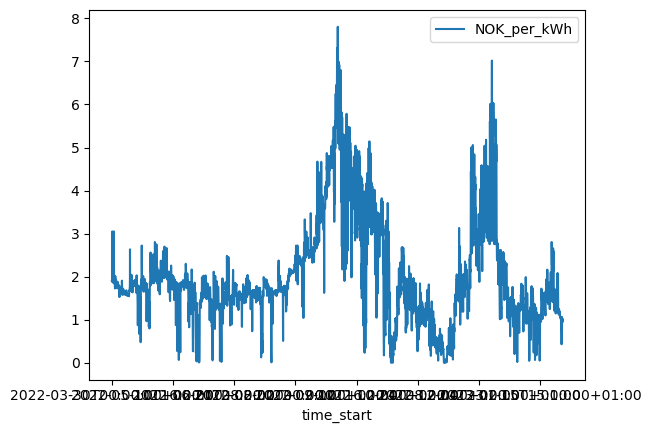

In [24]:
hist.plot(x='time_start', y='NOK_per_kWh')
plt.show()